# Charakteristiky termistoru

## Setup

In [3]:
from protokol import *
import uncertainties
from uncertainties import ufloat as uf
from uncertainties.unumpy import nominal_values as noms
from uncertainties.unumpy import std_devs as stds
import uncertainties.umath as um
from uncertainties import unumpy

In [24]:
from IPython.display import display, HTML, Latex
display(HTML(
"""
<style>
div.output.output_scroll {
    box-shadow: none;
}
</style>"""
))

In [237]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (4*1.5,2.5*1.5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.unicode"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]
plt.rcParams["text.latex.preamble"] = r"""
\usepackage[decimalsymbol=comma]{siunitx}
\usepackage{amsmath}
"""

In [5]:
def relative(self):
    return self.s / self.n

uncertainties.core.Variable.rel = relative

## Úkol 1

### Data

In [6]:
va = pd.read_csv("../raw/VA_edit.txt", delim_whitespace=True)
va.I = va.I * 1e-3

In [7]:
va.U = va.U.apply(lambda h: uf(h, 0.0005 * h + 0.0003))
va.I = va.I.apply(lambda h: uf(h, 0.003 * h + 0.00003))

In [114]:
print("va:")
display(va)

va:


,I,U
0,(2.0+/-3.0)e-05,0.00230+/-0.00030
1,(8.0+/-3.0)e-05,0.04700+/-0.00032
2,0.000200+/-0.000031,0.1191+/-0.0004
3,0.000310+/-0.000031,0.1834+/-0.0004
4,0.000390+/-0.000031,0.2332+/-0.0004
5,0.000490+/-0.000031,0.2933+/-0.0004
6,0.000600+/-0.000032,0.3529+/-0.0005
7,0.000730+/-0.000032,0.4206+/-0.0005
8,0.000800+/-0.000032,0.4564+/-0.0005
9,0.000910+/-0.000033,0.5092+/-0.0006


### Graf statické VA charakteristiky

In [223]:
from scipy.interpolate import UnivariateSpline

I_mA = va.I * 1000
noms_I = noms(I_mA)
noms_U = noms(va.U)

U_int_f = UnivariateSpline(noms_I, noms_U, s=0)
I_int = sp.linspace(noms_I.min(), noms_I.max(), 500)
U_int = U_int_f(I_int)
U_int[-1]

0.94779999999999998

In [261]:
def primka(x, a, b):
    return a*x + b

fit_values = 10

params, errs = fit(primka, noms(va.I)[:fit_values], noms(va.U)[:fit_values], sigma=stds(va.U)[:fit_values])
R_0 = params[0]
T_0 = uf(295.5182, 0.5)
T_0 - 273.15

22.3682+/-0.5

In [238]:
teploty = K * U_int * I_int * 1e-3 + T_0

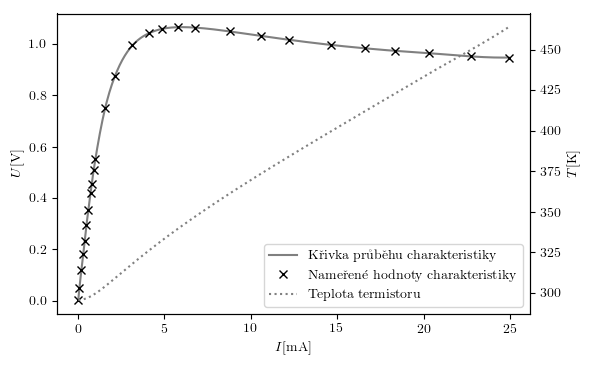

In [251]:
fig = plt.figure()
ax = plt.axes()

ax2 = ax.twinx()
ax2.plot(I_int, noms(teploty), ":", c="gray", label="Teplota termistoru")
ax.plot(I_int, U_int, c="gray", label="Křivka průběhu charakteristiky")
ax.plot(noms_I, noms_U, "kx", label="Nameřené hodnoty charakteristiky")

ax.set_xlabel("$I[\si{mA}]$")
ax.set_ylabel("$U[\si{V}]$")
ax2.set_ylabel("$T[\si{\kelvin}]$")
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2)
fig.tight_layout()
fig.savefig("../plot/va.pdf")

## Úkol 2

### Data

In [10]:
rt = pd.read_csv("../raw/RT_edit.txt", delim_whitespace=True)

In [11]:
def rt_R_t_err_eval(h):
    err = 0.0015*h
    if h > 240:
        err += 30
    else:
        err += 0.3
    
    return uf(h, err)

In [12]:
rt.R_Pt = rt.R_Pt.apply(lambda h: uf(h, 0.002*h + 0.05))
rt.R_t = rt.R_t.apply(rt_R_t_err_eval)

### Převod odporu na stupně

In [13]:
def odpor_na_stupne(odpor):
    R_0 = 100
    alfa = 3.85e-3
    return (odpor - R_0) / (alfa*R_0)

In [14]:
rt["T"] = odpor_na_stupne(rt.R_Pt) + 273.15

In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(rt)

,R_Pt,R_t,T
0,68.10+/-0.19,(6.492+/-0.013)e+04,190.3+/-0.5
1,68.46+/-0.19,(6.186+/-0.012)e+04,191.2+/-0.5
2,68.80+/-0.19,(5.908+/-0.012)e+04,192.1+/-0.5
3,69.27+/-0.19,(5.551+/-0.011)e+04,193.3+/-0.5
4,69.72+/-0.19,(5.235+/-0.011)e+04,194.5+/-0.5
5,70.22+/-0.19,(4.900+/-0.010)e+04,195.8+/-0.5
6,70.70+/-0.19,(4.605+/-0.010)e+04,197.0+/-0.5
7,71.46+/-0.19,(4.181+/-0.009)e+04,199.0+/-0.5
8,72.35+/-0.19,(3.727+/-0.009)e+04,201.3+/-0.5
9,72.91+/-0.20,(3.460+/-0.008)e+04,202.8+/-0.5


### Graf odporu na teplotě

In [255]:
def f_exp(x, a, b, c, d):
    return a*sp.exp(b*(x + c)) + d

noms_R_t = noms(rt.R_t) * 1e-3
noms_T = noms(rt["T"])

params, errs = fit(f_exp, noms_T, noms_R_t, p0=(2.9e-1, -1.2e0, -200, 0))
ABCD = params

c:\tools\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


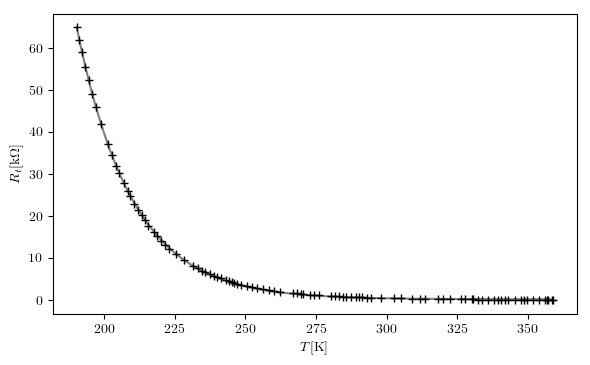

In [256]:
fig = plt.figure()
ax = plt.axes()

ax.plot(*curve(noms_T, f_exp, params, overrun=0), c="gray")
ax.plot(noms_T, noms_R_t, "k+")

ax.set_xlabel("$T[\si{\kelvin}]$")
ax.set_ylabel("$R_t[\si{\kilo\ohm}]$")
fig.tight_layout()
fig.savefig("../plot/rt.pdf")

### Graf odporu na 1/T

In [134]:
def f_exp(x, a, b):#, c, d):
    return a*sp.exp(b*(x))# + c)) + d

noms_R_t = noms(rt.R_t)
noms_one_over_T = 1 / noms(rt["T"])

params, errs = fit(f_exp, noms_one_over_T[20:], noms_R_t[20:], p0=(1e2,1e3))#,-1e-3,0))

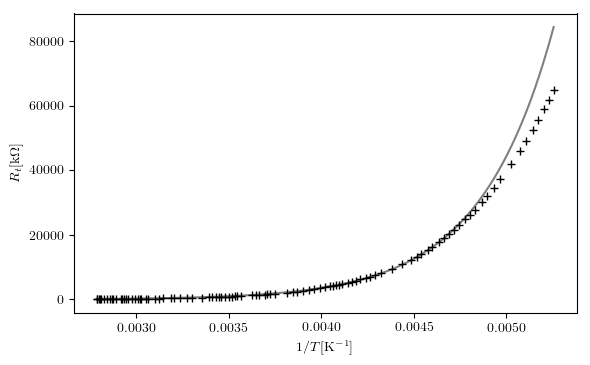

In [112]:
fig = plt.figure()
ax = plt.axes()

ax.plot(*curve(noms_one_over_T, f_exp, params, overrun=0), c="gray")
ax.plot(noms_one_over_T, noms_R_t, "k+")

ax.set_xlabel("$1/T[\si{\per\kelvin}]$")
ax.set_ylabel("$R_t[\si{\kilo\ohm}]$")
fig.tight_layout()

### Graf log R = f(1/T)

In [258]:
log_R = unumpy.log(rt.R_t.values)
one_o_T = 1 / rt["T"].values

log_R = sp.flip(log_R, 0)
one_o_T = sp.flip(one_o_T, 0)

fit_points = len(log_R)

params, errs = fit(primka, noms(one_o_T)[:fit_points], noms(log_R)[:fit_points], sigma=stds(log_R)[:fit_points])

log_R_infty = uf(params[1], errs[1])
R_infty = unumpy.exp(log_R_infty)
B = uf(params[0], errs[0])
print(R_infty)

0.086+/-0.004


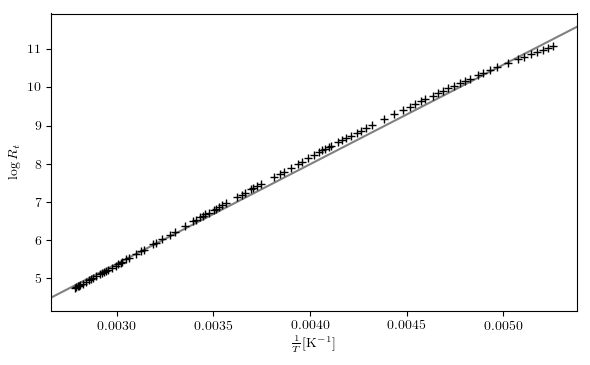

In [254]:
fig = plt.figure()
ax = plt.axes()

ax.plot(*curve(noms(one_o_T), primka, params), c="gray")
ax.plot(noms(one_o_T), noms(log_R), "k+")

ax.set_xlabel(r"$\frac{1}{T} [\si{\per\kelvin}]$")
ax.set_ylabel("$\log R_t$")
ax.margins(x=0)

fig.tight_layout()
fig.savefig("../plot/fit_log_R.pdf")

## Úkol 3

### Konstanty

In [259]:
delta_U = 2*8.314*B
print(delta_U)

(4.340+/-0.019)e+04


In [260]:
alpha = B / (298.15**2)
print(alpha)

0.02936+/-0.00013


In [263]:
T_m = 0.5 * (B - um.sqrt(B*(B - 4*T_0)))
print(T_m)
U_m = va.U[16]
I_m = va.I[16]
K = (T_m - T_0) / (U_m*I_m)
print(K)

339.7+/-0.7
(7.14+/-0.08)e+03


## Zbytek

In [115]:
def latex_table(df):
    col_names = list(df.columns)
    cols = {}
    
    for c in list(df.columns):
        err = stds(df[c])
        if sp.count_nonzero(err) > 0: 
            cols[c] = []
            cols[f"s_{c}"] = []
            for v in df[c]:
                nom_cast, err_cast = "{:1}".format(v).split("+/-")
                cols[c].append(nom_cast)
                cols[f"s_{c}"].append(err_cast)
        else:
            cols[c] = list(df[c])
    for name, data in cols.items():
        longest = len(name)
        for val in data:
            if len(str(val)) > longest:
                longest = len(str(val))
        cols[name] = list(map(lambda h: str(h).ljust(longest + 1), data))
    
    cols_list = []
    for i in range(len(col_names)):
        cols_list.append([col_names[0]] + cols[col_names[0]])
        try:
            cols_list.append([f"s_{col_names[0]}"] + cols[f"s_{col_names[0]}"])
        except KeyError:
            pass
        col_names.pop(0)
    
    for i in cols_list:
        i[0] = i[0].ljust(len(i[1]))
    
    rows_list = list(map(list, zip(*cols_list)))
    
    rows = ["& ".join(r) for r in rows_list]
    
    out = "\\\\ \n".join(rows) + "\\\\"
    
    return out

In [121]:
va_print = pd.DataFrame()
va_print["I"] = va.I * 1e3
va_print["U"] = va.U
print(latex_table(rt))

R_Pt   & s_R_Pt & R_t       & s_R_t     & T     & s_T \\ 
68.10  & 0.19   & 6.492e+04 & 0.013e+04 & 190.3 & 0.5 \\ 
68.46  & 0.19   & 6.186e+04 & 0.012e+04 & 191.2 & 0.5 \\ 
68.80  & 0.19   & 5.908e+04 & 0.012e+04 & 192.1 & 0.5 \\ 
69.27  & 0.19   & 5.551e+04 & 0.011e+04 & 193.3 & 0.5 \\ 
69.72  & 0.19   & 5.235e+04 & 0.011e+04 & 194.5 & 0.5 \\ 
70.22  & 0.19   & 4.900e+04 & 0.010e+04 & 195.8 & 0.5 \\ 
70.70  & 0.19   & 4.605e+04 & 0.010e+04 & 197.0 & 0.5 \\ 
71.46  & 0.19   & 4.181e+04 & 0.009e+04 & 199.0 & 0.5 \\ 
72.35  & 0.19   & 3.727e+04 & 0.009e+04 & 201.3 & 0.5 \\ 
72.91  & 0.20   & 3.460e+04 & 0.008e+04 & 202.8 & 0.5 \\ 
73.49  & 0.20   & 3.201e+04 & 0.008e+04 & 204.3 & 0.5 \\ 
73.92  & 0.20   & 3.029e+04 & 0.008e+04 & 205.4 & 0.5 \\ 
74.55  & 0.20   & 2.782e+04 & 0.007e+04 & 207.0 & 0.5 \\ 
75.03  & 0.20   & 2.610e+04 & 0.007e+04 & 208.3 & 0.5 \\ 
75.41  & 0.20   & 2.479e+04 & 0.007e+04 & 209.3 & 0.5 \\ 
75.97  & 0.20   & 2.300e+04 & 0.006e+04 & 210.7 & 0.5 \\ 
76.47  & 0.20 